Epoch:  0 ; Error: 24185.913927440102
Test error = 29695.71842191798 

Epoch:  100 ; Error: 416.5557172150269
Test error = 222.70096540221613 

Epoch:  200 ; Error: 310.7088599890931
Test error = 320.6152602271613 

Epoch:  300 ; Error: 282.126879013279
Test error = 266.1898746898803 

Epoch:  400 ; Error: 263.5938634793938
Test error = 220.6030673766902 

Epoch:  500 ; Error: 251.4267211180238
Test error = 188.4833138343439 

Epoch:  600 ; Error: 243.3583533030164
Test error = 165.81028498518316 

Epoch:  700 ; Error: 237.9297267998483
Test error = 149.59142901935996 

Epoch:  800 ; Error: 234.2016766894621
Test error = 137.8145632549501 

Epoch:  900 ; Error: 231.56966847455325
Test error = 129.12656373068327 

Epoch:  1000 ; Error: 229.64456406137595
Test error = 122.61064611747148 

Epoch:  1100 ; Error: 228.17587269501996
Test error = 117.64010361224462 

Epoch:  1200 ; Error: 227.00234879062654
Test error = 113.78228972645664 

Epoch:  1300 ; Error: 226.02019253232928
Test error 

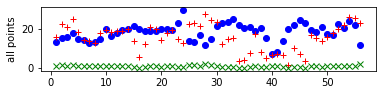

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
total_features, total_prices = load_boston(True)

#train_features = total_features[:450,[0,1,2,4,5,6,7,8,9,10,12]]
sp = [0,1,2,3,4,5,6,7,8,9,10,11,12]
num_features = 13
train_features = total_features[:450,sp]
train_prices = total_prices[:450] 
test_features = total_features[450:,sp] 
test_prices = total_prices[450:]

A = tf.Variable(np.random.rand(num_features,1), dtype=tf.float64) 
b = tf.Variable(tf.zeros(1, dtype=tf.float64))
learning_rate = 0.00000005
epochs = 10000

#calculate predictions 
def calc_predictions(x): 
    predictions = tf.add(b, tf.matmul(x, A)) 
    return predictions 
#calculate error 
def calc_error(y,targets): 
    error = tf.reduce_mean(tf.square(y - targets)) 
    return error

error = calc_error(calc_predictions(train_features),train_prices)

#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

#create session
with tf.compat.v1.Session() as sess: 
    #init variables 
    sess.run(tf.compat.v1.global_variables_initializer())
    #train for epochs num
    #Занесение данных о функции ошибки в 1 массив
    tst = -1;
    for i in list(range(epochs)):
        _error, _train_step = sess.run([error,optimizer])
        if i % 100 == 0:
            print('Epoch: ', i, '; Error:', _error)
            predictions, test_error = sess.run([calc_predictions(test_features), calc_error(calc_predictions(test_features), test_prices)])
            print('Test error =', test_error, '\n')
      #      if (tst == -1):
      #          tst = test_error
      #      if (tst < test_error):
      #          break
      #      if (tst > test_error):
      #          tst = test_error
    #testing the model #проверка модели на тестовом множестве
    predictions, test_error = sess.run([calc_predictions(test_features), calc_error(calc_predictions(test_features), test_prices)])
    print('Test error =', test_error, '\n')
#Переменные которые отображаются на графиках
    points = [[], []] 
    points_test = [[],[],[],[]] 
    points_test_err =[[],[]]

    #train for epochs num 
    #for i in list(range(epochs)): 
    #    _error, _train_step = sess.run([error, optimizer])
    #    if i % 100 == 0:
    #        print('Epoch: ', i, '; Error:', _error)
    #    if i % 10 == 0. : 
    #        points[0].append(i+1) 
    #        points[1].append(_error)

   # plt.plot(points[0], points[1], 'r--') 
   # plt.axis([0, epochs, 50, 100]) 
   # plt.show() #№сбор информации о тестировании
    predictions, test_error = sess.run([calc_predictions(test_features), calc_error(calc_predictions(test_features), test_prices)])
    for i in range(len(test_prices)): 
        err = abs(test_prices[i]-predictions[i])
        points_test_err[0].append(i+1)
        points_test_err[1].append(err)
        points_test[0].append(i+1)
        points_test[1].append(test_prices[i])
        points_test[2].append(predictions[i])
        points_test[3].append((predictions[i]/test_prices[i]))
   #Создание и отрисовка графика
    plt.subplot(3, 1, 3)
    plt.plot(points_test[0], points_test[1], 'bo') #test_class
    plt.plot(points_test[0], points_test[2], 'r+') #predictions
    plt.plot(points_test[0], points_test[3], 'gx') #predictions_classes
    plt.ylabel('all points')
    plt.show()
    
    


    

